<type 'file'>
<class 'numpy.recarray'>
(u'year', u'agriculture', u'architecture', u'art_and_performance', u'biology', u'business', u'communications_and_journalism', u'computer_science', u'education', u'engineering', u'english', u'foreign_languages', u'health_professions', u'math_and_statistics', u'physical_sciences', u'psychology', u'public_administration', u'social_sciences_and_history')


(1968.5, 2011.1)

(-0.25, 90)

([<matplotlib.axis.XTick at 0x10ef4b350>,
 <a list of 5 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x10ef53d90>,
 <a list of 10 Text yticklabel objects>)

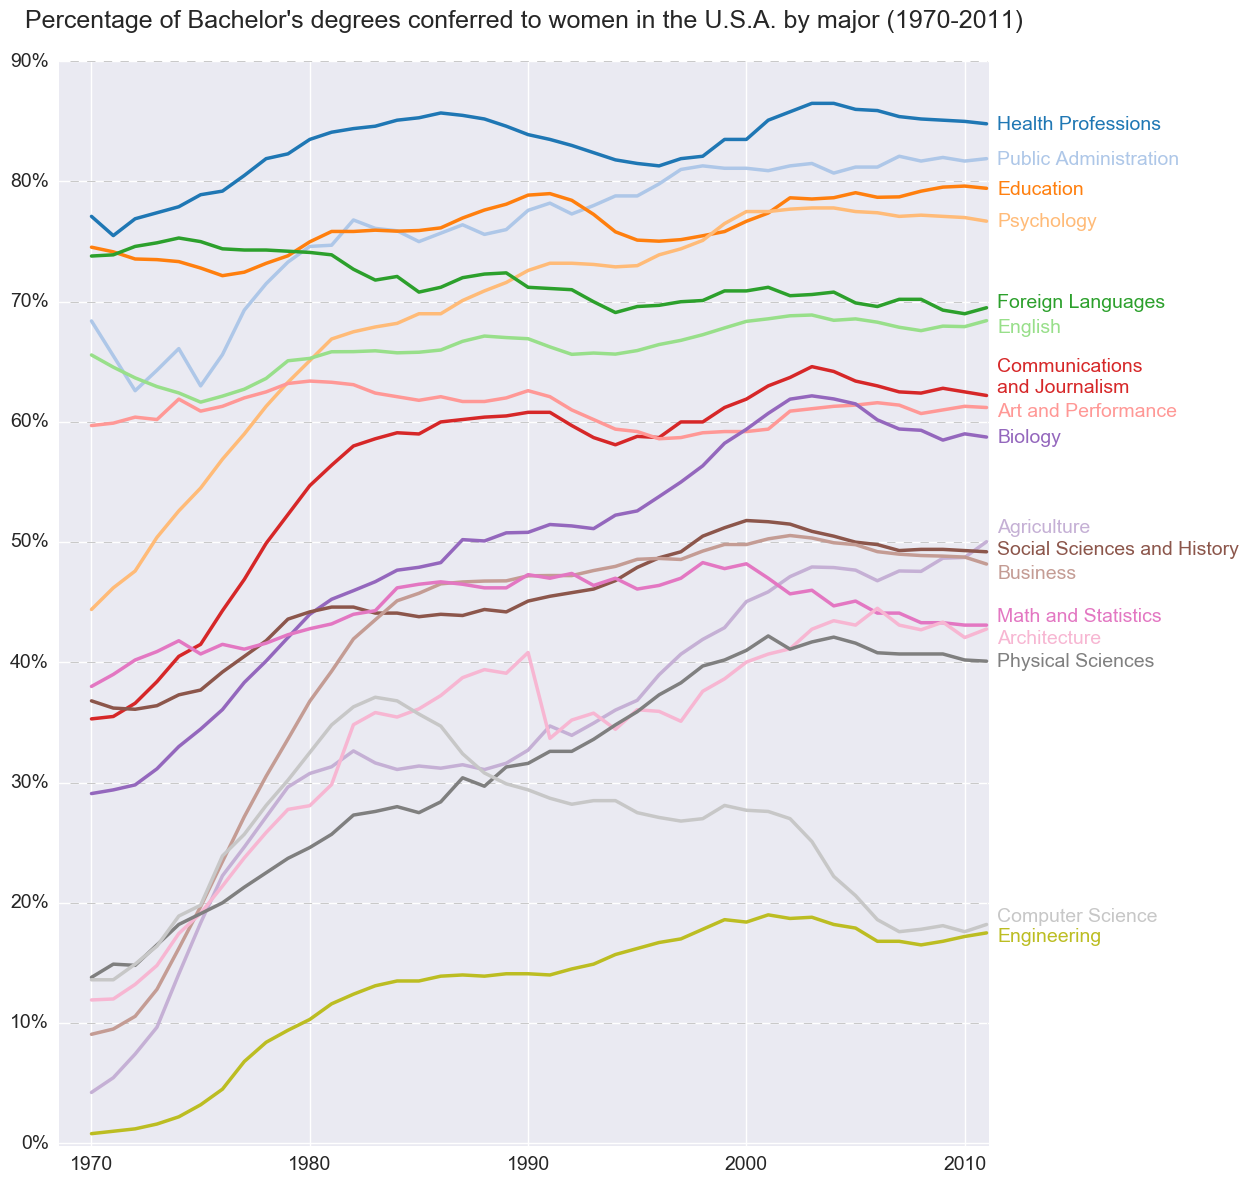

In [12]:
# https://plot.ly/ipython-notebooks/cufflinks/
import datetime
from IPython.display import display  #from sqlalchemy import create_engine
import plotly.plotly as py # interactive graphing
from plotly.graph_objs import * #Bar, Scatter, Marker, Layout, Data, Line, Legend, Font
import plotly.graph_objs as go
import plotly.plotly as py
#from plotly.graph_objs import *
#py.sign_in('username', 'api_key')
#import pandas.io.data as web
from pandas_datareader import data, wb
import pandas_datareader.data as web
#pdr.get_data_yahoo('AAPL')

import pandas as pd
import numpy as np


from matplotlib.mlab import csv2rec
from matplotlib.cbook import get_sample_data
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

fname = get_sample_data('percent_bachelors_degrees_women_usa.csv')
gender_degree_data = csv2rec(fname)
print type(fname)
print type(gender_degree_data)
print gender_degree_data.dtype.names

# These are the colors that will be used in the plot
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

# You typically want your plot to be ~1.33x wider than tall. This plot
# is a rare exception because of the number of lines being plotted on it.
# Common sizes: (10, 7.5) and (12, 9)
fig, ax = plt.subplots(1, 1, figsize=(12, 14))

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
plt.xlim(1968.5, 2011.1)
plt.ylim(-0.25, 90)

# Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
plt.xticks(range(1970, 2011, 10), fontsize=14)
plt.yticks(range(0, 91, 10), ['{0}%'.format(x)
                              for x in range(0, 91, 10)], fontsize=14)

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
for y in range(10, 91, 10):
    plt.plot(range(1969, 2012), [y] * len(range(1969, 2012)), '--',
             lw=0.5, color='black', alpha=0.3)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted.
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='on', left='off', right='off', labelleft='on')

# Now that the plot is prepared, it's time to actually plot the data!
# Note that I plotted the majors in order of the highest % in the final year.
majors = ['Health Professions', 'Public Administration', 'Education',
          'Psychology', 'Foreign Languages', 'English',
          'Communications\nand Journalism', 'Art and Performance', 'Biology',
          'Agriculture', 'Social Sciences and History', 'Business',
          'Math and Statistics', 'Architecture', 'Physical Sciences',
          'Computer Science', 'Engineering']

y_offsets = {'Foreign Languages': 0.5, 'English': -0.5,
             'Communications\nand Journalism': 0.75,
             'Art and Performance': -0.25, 'Agriculture': 1.25,
             'Social Sciences and History': 0.25, 'Business': -0.75,
             'Math and Statistics': 0.75, 'Architecture': -0.75,
             'Computer Science': 0.75, 'Engineering': -0.25}

for rank, column in enumerate(majors):
    # Plot each line separately with its own color.
    column_rec_name = column.replace('\n', '_').replace(' ', '_').lower()

    line = plt.plot(gender_degree_data.year,
                    gender_degree_data[column_rec_name],
                    lw=2.5,
                    color=color_sequence[rank])

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = gender_degree_data[column_rec_name][-1] - 0.5

    if column in y_offsets:
        y_pos += y_offsets[column]

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    plt.text(2011.5, y_pos, column, fontsize=14, color=color_sequence[rank])

# Make the title big enough so it spans the entire plot, but don't make it
# so big that it requires two lines to show.

# Note that if the title is descriptive enough, it is unnecessary to include
# axis labels; they are self-evident, in this plot's case.
plt.title('Percentage of Bachelor\'s degrees conferred to women in '
          'the U.S.A. by major (1970-2011)\n', fontsize=18, ha='center')

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
plt.savefig('percent-bachelors-degrees-women-usa.png', bbox_inches='tight')
plt.show()

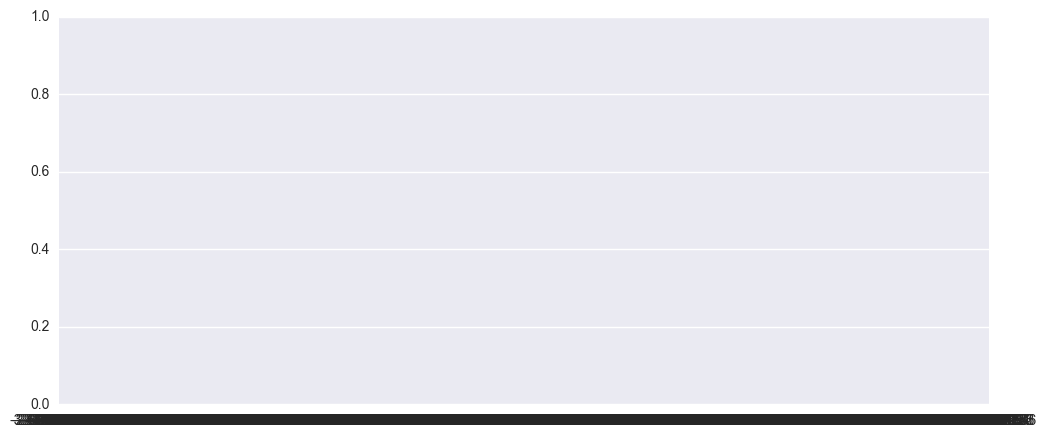

In [10]:
#passing the day of year as the grouper to seaborn, if your data spans multiple years this wouldn't work. 
#You could then consider something like:  ts.index.to_series().apply(lambda x: x.strftime('%Y%m%d'))


n = 480
ts = pd.Series(np.random.randn(n), index=pd.date_range(start="2014-02-01", periods=n, freq="D"))


fig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(ts, ts.index.dayofyear, ax=ax)



'\nShow how to make date plots in matplotlib using date tick locators and\nformatters.  See major_minor_demo1.py for more information on\ncontrolling major and minor ticks\n\nAll matplotlib date plotting is done by converting date instances into\ndays since the 0001-01-01 UTC.  The conversion, tick locating and\nformatting is done behind the scenes so this is most transparent to\nyou.  The dates module provides several converter functions date2num\nand num2date\n\nThis example requires an active internet connection since it uses\nyahoo finance to get the data for plotting\n'

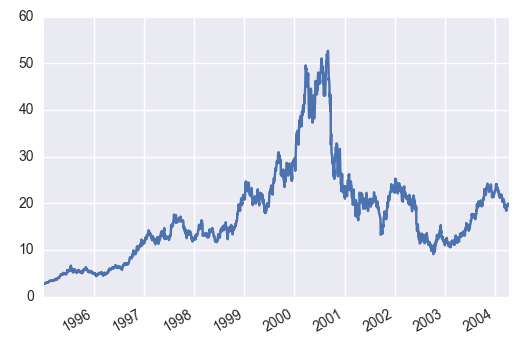

In [13]:
#!/usr/bin/env python
"""
Show how to make date plots in matplotlib using date tick locators and
formatters.  See major_minor_demo1.py for more information on
controlling major and minor ticks

All matplotlib date plotting is done by converting date instances into
days since the 0001-01-01 UTC.  The conversion, tick locating and
formatting is done behind the scenes so this is most transparent to
you.  The dates module provides several converter functions date2num
and num2date

This example requires an active internet connection since it uses
yahoo finance to get the data for plotting
"""

import matplotlib.pyplot as plt
from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime
date1 = datetime.date(1995, 1, 1)
date2 = datetime.date(2004, 4, 12)

years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')

quotes = quotes_historical_yahoo_ochl('INTC', date1, date2)
if len(quotes) == 0:
    raise SystemExit

dates = [q[0] for q in quotes]
opens = [q[1] for q in quotes]

fig, ax = plt.subplots()
ax.plot_date(dates, opens, '-')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.fmt_xdata = DateFormatter('%Y-%m-%d')
ax.fmt_ydata = price
ax.grid(True)

fig.autofmt_xdate()
plt.show()

In [ ]:
w = 7195
h = 3841

im_np = np.random.rand(h, w)

fig = plt.figure(frameon=False)
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(im_np, aspect='normal')
fig.savefig('figureDPI.png', dpi=1)

#fig.show()
plt.show()

/Users/natalia/.virtualenvs/keras/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning:

The normal aspect was deprecated in version 1.2. Use auto instead.



32512

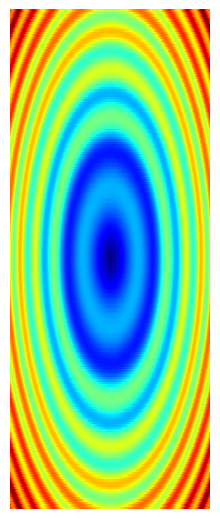

In [2]:
# LARGE IMAGES
import numpy
import os
import matplotlib
# huge images can't be displayed on a screen, so directly use Agg
matplotlib.use("Agg")

import matplotlib.pyplot as plt
%matplotlib inline

# init the figure
fig_w, fig_h = 33000, 500 # pixels
dpi=100
fig = plt.figure(figsize=(float(fig_w)/float(dpi), float(fig_h)/float(dpi)), dpi=dpi, frameon=False)

# create some 2D data to plot
X, Y = numpy.mgrid[-5:5:0.05, -5:5:0.05]
Z = numpy.sqrt(X**2 + Y**2) + numpy.sin(X**2 + Y**2)

# create the axe around the pixel position 32768 where appears the bug
im_h, im_w = Z.shape
im_l = 32768 - im_w/2.
ax = plt.Axes(fig, [float(im_l)/float(fig_w), 0, float(im_w)/float(fig_w), 1], frameon=False)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
fig.add_axes(ax)

# plot the data 
#   image based objects based are successfully displayed : imshow, pcolorfast
#   mesh based objects basedfail to be displayed : pcolor, pcolormesh
#ax.imshow(Z) # Success
#ax.pcolorfast(Z) # Sucess
ax.pcolormesh(Z) # Failure
#ax.pcolor(Z) # Failure

# see what's going on
fname="out.png"
plt.savefig(fname)
os.system("gimp " + fname)

/Users/natalia/.virtualenvs/keras/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


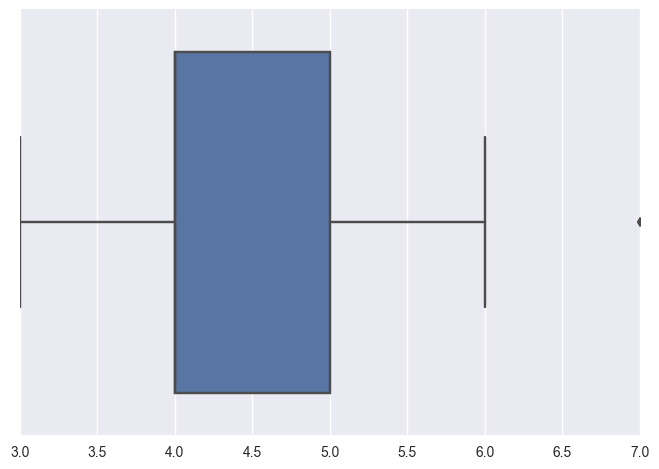

In [3]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(
[
[2, 4, 5, 6, 1],
[4, 5, 6, 7, 2],
[5, 4, 5, 5, 1],
[10, 4, 7, 8, 2],
[9, 3, 4, 6, 2],
[3, 3, 4, 4, 1]
], columns=['a1', 'a2', 'a3', 'a4', 'b'])

#Plotting by seaborn
sns.boxplot(df[['a1','a2', 'a3', 'a4']], groupby=df.b)

In [ ]:
def merge_dfs_by_key(dfs, key):      
    # merge all partial df per category into one df by datepoint (date only, not time)"
    merged = dfs[0]
    for df in dfs[1:]:
        merged = merged.merge(df, on=key)
    return merged

### Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

In [ ]:
def boxplots_failed():
    #sns.boxplot(QIR_daily_per_cat[['QIR']], groupby=QIR_daily_per_cat.category)
    #sns.boxplot(QIR_per_cat_daily['Quote'], groupby=QIR_per_cat_daily.datepoint) 
    # bad vis. 0: QIR_daily_per_cat.groupby('category').boxplot(column='QIR', figsize =(9,5))#, by='datepoint')
    #bad visualization1
    #sns.boxplot(QIR_daily_per_cat.QIR, groupby=QIR_daily_per_cat.category)
    #sns.stripplot(x=QIR_daily_per_cat["category"], y=QIR_daily_per_cat["QIR"], data=QIR_daily_per_cat.QIR)#, jitter=True);

    #bad visualization2:
    #color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
    #QIR_daily_per_cat.QIR.plot(kind='box', color=color, sym='r+', figsize =(9,5))

    # doesnt work for categ. x? sns.boxplot(QIR_daily_per_cat[['QIR']], groupby=QIR_daily_per_cat.datepoint)

    # med = QIR_daily_per_cat.QIR.median()
    # med.sort_values(inplace=True)
    # med.set_index(['QIR'])
    # sorteddf = df[med.index]
    
def make_column_binary(df, column):
    #data[column].replace(value= '0')
    # data[column].replace(np.nan,0)
    # data[column].replace(isinstance(data[column], datetime.datetime), 1)
    # data[column].astype(np.int16)# binary quote rate (1 if quote occurrs and 0 if not)
    
    #data[column] = data[column].apply(lambda x: 1 if isinstance(x, datetime.datetime))
    #data[column] = data[column].apply(lambda x: 0 if isinstance(x, np.nat))
    #data[column] = data[column].dropna(0, inplace=True)
    
    # returns a Boolean series which is True where the input series is not null (None, np.NaN, np.NaT)
    #return df[pd.notnull(df[column])]
    df[column] = df[column].apply(lambda x: 1 if isinstance(x, datetime.datetime) 
                                       and not isinstance(x, pd.tslib.NaTType) else 0)
    return df


N = 30.     # Number of boxes

# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# and marching around the hue. 
# Plotly accepts any CSS color format, see e.g. http://www.w3schools.com/cssref/css_colors_legal.asp.
c = ['hsl('+str(h)+',50%'+',50%)' for h in linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour. 
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
data = [{
    'y': 3.5*sin(pi * i/N) + i/N+(1.5+0.5*cos(pi*i/N))*random.rand(10), 
    'type':'box',
    'marker':{'color': c[i]}
    } for i in range(int(N))]

# format the layout
layout = {'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False},
          'yaxis': {'zeroline':False,'gridcolor':'white'},
          'paper_bgcolor': 'rgb(233,233,233)',
          'plot_bgcolor': 'rgb(233,233,233)',
          }

py.iplot(data)